In [20]:

import kntools as kt #(erc-karst/KNtools package -- need pip install e .)
import os
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
#load graph
cavename = 'GouffreDejaVu'

list_folder = os.listdir('../data')
#find automatically the number associated with the cavename
number = [item.split('_')[0] for item in list_folder if cavename in item][0]

path_to_pickle = f'../data/{number}_{cavename}/clean_data/Graph_{cavename}.pickle'
G = pickle.load(open(path_to_pickle, 'rb'))

In [22]:
#some metadata are attached to the graph. you can access them with:
G.graph

{'cavename': 'GouffreDejaVu',
 'crs': 'local',
 'original_data_rights': 'CC BY-NC-SA 4.0',
 'citation': 'Centre Terre. (2024). Survey Data for the Ultima Patagonia Cave Exploration project [Dataset]. https://github.com/tr1813/ultima-patag'}

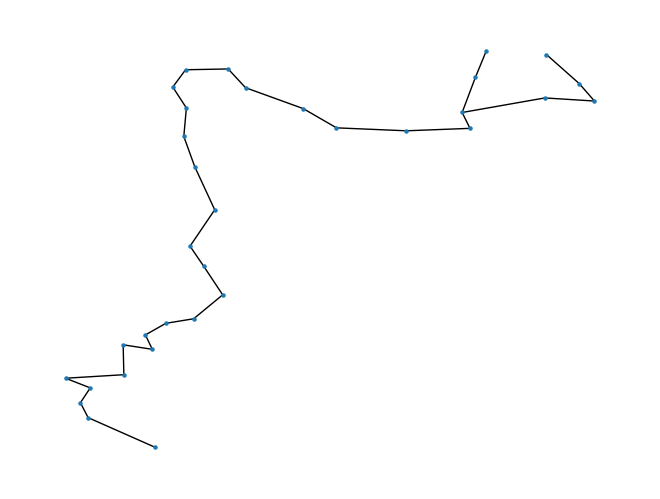

In [23]:
#example on how to plot the graph using the pos2d function from KNtools toolbox
#this function creates a dictionnary of x,y position
pos2d = kt.get_pos2d(G)
nx.draw(G,pos=pos2d,node_size=5)

In [24]:
#If you want to know which attributes are attached to the graph:

# get a list of all the dictionnaries that exists:
print(kt.get_nodes_attributes(G))


{'fulladdress', 'splays', 'csdim', 'pos', 'idsql'}


In [25]:
#example to access the attributes:
pos3d = nx.get_node_attributes(G,'pos')

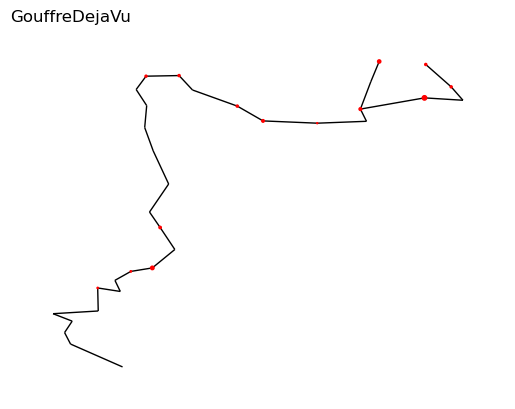

In [ ]:
#exemple PLOT WITH WEIGHTED NODE GEOMETRY
node_sizes = []
labels = {}
for n in G.nodes:
    if G.nodes('csdim')[n] is not None:
        node_sizes.append( nx.get_node_attributes(G,'csdim')[n][0]*1 )
    else:
        node_sizes.append( 0.0 )

plt.figure()
ax = plt.gca()
ax.set_title(cavename, loc='left',ha='left', wrap=True )
nx.draw(G,kt.get_pos2d(G),node_size=node_sizes ,with_labels=False, node_color='red', ax=ax)